In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv("/content/train.csv")

In [4]:
df.shape

(38932, 5)

In [5]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [8]:
df.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id16187,1
Description,38932,38932,I brought my -- year old daughter to New York ...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [11]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys=['count','percentage'])
print('count and percantage of missing values for the columns:')
missing_data


count and percantage of missing values for the columns:


,count,percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


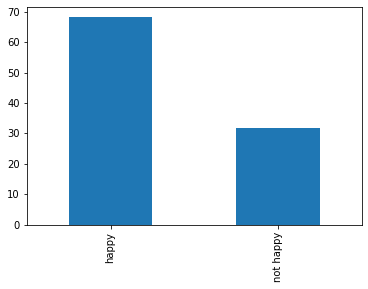

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
print("percentage for default\n")
print(round(df.Is_Response.value_counts(normalize=True)*100,2))
round(df.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.show()

In [14]:
 df.drop(columns=['User_ID','Browser_Used','Device_Used'],inplace=True)

In [15]:
df.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [16]:
import re
import string

def text_clean_1(text):
  text = text.lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
  text = re.sub('\w*\d\w*','',text)
  return text

cleaned1 = lambda x: text_clean_1(x)

In [17]:
df['cleaned_description'] = pd.DataFrame(df.Description.apply(cleaned1))
df.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [22]:
def text_clean_2(text):
  text = re.sub('[''""...]','',text)
  text = re.sub('\n','',text)
  return text

cleaned2 = lambda x: text_clean_2(x)

In [23]:
df['cleaned_description_new'] = pd.DataFrame(df['cleaned_description'].apply(cleaned2))
df.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


In [24]:
from sklearn.model_selection import train_test_split
x = df.cleaned_description_new
y = df.Is_Response


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=225)

In [27]:
print('x_train :', len(x_train))
print('x_test :', len(x_test))
print('y_train :', len(y_train))
print('y_test :', len(y_test))

x_train : 35038
x_test : 3894
y_train : 35038
y_test : 3894


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver='lbfgs')

from sklearn.pipeline import Pipeline

In [35]:
model = Pipeline([('vectorizer',tvec),('classifier', clf2)])
model.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix
predictions = model.predict(x_train)
confusion_matrix(predictions, y_train)

array([[22923,  2024],
       [ 1027,  9064]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy:", accuracy_score(predictions, y_test))
print("Precision:", precision_score(predictions, y_test, average='weighted'))
print("Recall:", recall_score(predictions, y_test, average='weighted'))

In [45]:
example = ['i think you not deserve me']
result = model.predict(example)

print(result)

['not happy']
